In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import hypernetx.algorithms.contagion as contagion
from hnxwidget import HypernetxWidget

## Create a hypergraph

In [7]:
n = 100
m = 1000

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=False)

In [ ]:
# HypernetxWidget

## Initialize simulation variables
- $\tau$ is a dictionary of the infection rate for each hyperedge size
- $\gamma$ is the healing rate
- $t_{max}$ is the time at which to terminate the simulation if it hasn't already
- $\Delta t$ is the time step size to use for the discrete time algorithm

In [3]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 0.1

## Run the SIR epidemic simulations
- The discrete SIR takes fixed steps in time and multiple infection/healing events can happen at each time step.
- The Gillespie SIR algorithm takes steps in time exponentially distributed and at each step forward, a single event occurs
- As $\Delta t\to 0$, the discrete time algorithm converges to the Gillespie algorithm. 

In [4]:
start = time.time()
t1, S1, I1, R1 = contagion.discrete_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2, R2 = contagion.Gillespie_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax)
print(time.time() - start)

4.527276992797852
0.1573178768157959


## Plot of the results
- Dashed lines are the results from the discrete time algorithm
- Solid lines are the results from the Gillespie algorithm
- Plots of the numbers susceptible, infected, and recovered over time

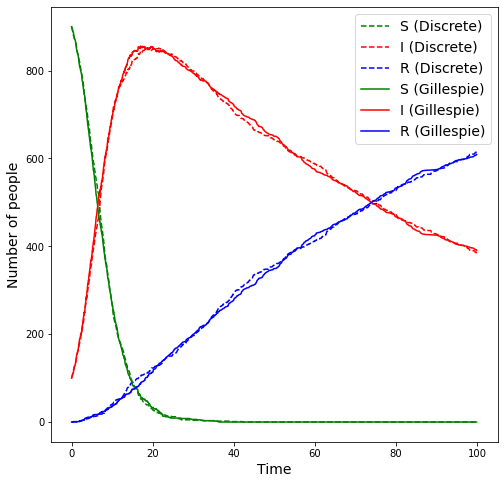

In [5]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t1, R1, 'b--', label='R (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.plot(t2, R2, 'b-', label='R (Gillespie)')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.savefig("sir.png", dpi=600)
plt.show()

## SIS Model
In this model, once individuals heal, they may become re-infected.

## Epidemic parameters

In [6]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1

In [7]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
start = time.time()
t1, S1, I1 = contagion.discrete_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2 = contagion.Gillespie_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax)
print(time.time() - start)

0.5761978626251221
0.25915002822875977


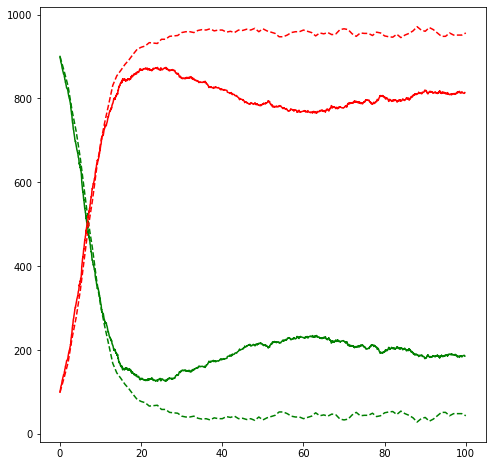

In [8]:
plt.figure()
plt.plot(t1, S1, 'g--')
plt.plot(t1, I1, 'r--')
plt.plot(t2, S2, 'g-')
plt.plot(t2, I2, 'r-')

plt.show()

## Animation of SIR model

In [9]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import random
import time
import hypernetx.algorithms.contagion as contagion
import numpy as np
from IPython.display import HTML

In [10]:
n = 100
m = 40

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList)

In [11]:
tau = {2:2, 3:1}
gamma = 0.1

In [12]:
transition_events = contagion.discrete_SIR(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [13]:
for time, events in transition_events.items():
    if events != []:
        for event in events:
            if event[0] == 'R':
                print(f"At time {time}, {event[1]} recovered")
            elif event[0] == 'I' and event[2] is not None:
                print(f"At time {time}, {event[1]} was infected by {event[2]}")

At time 1, 31 was infected by 0
At time 1, 30 was infected by 0
At time 1, 47 was infected by 1
At time 1, 79 was infected by 21
At time 1, 16 was infected by 3
At time 1, 0 was infected by 27
At time 1, 66 was infected by 28
At time 1, 18 was infected by 11
At time 1, 52 was infected by 11
At time 1, 68 was infected by 21
At time 1, 73 was infected by 24
At time 1, 43 was infected by 15
At time 1, 56 was infected by 15
At time 1, 11 was infected by 31
At time 1, 25 was infected by 26
At time 1, 48 was infected by 30
At time 1, 1 was infected by 31
At time 1, 77 was infected by 37
At time 2, 27 was infected by 2
At time 2, 88 was infected by 16
At time 2, 41 was infected by 13
At time 2, 23 was infected by 22
At time 2, 69 was infected by 6
At time 2, 33 was infected by 6
At time 2, 99 was infected by 36
At time 2, 97 was infected by 10
At time 2, 44 was infected by 10
At time 2, 68 recovered
At time 2, 50 was infected by 13
At time 2, 32 was infected by 35
At time 2, 91 was infected b

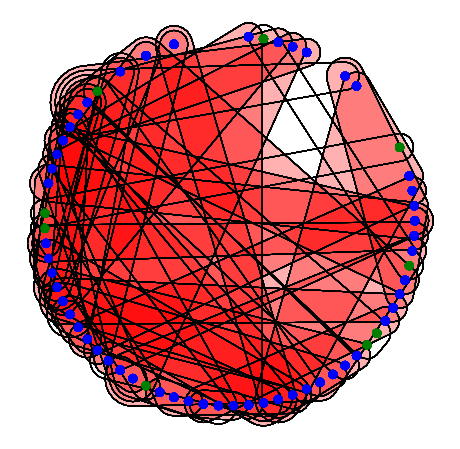

In [16]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, node_state_color_dict, edge_state_color_dict, node_radius=1, fps=fps)

In [17]:
HTML(animation.to_jshtml())